###**Importing Libraries**

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV
%matplotlib inline

**importing dataset from sklearn**

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

**to see the dataset what looks like**

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

**Loading the dataset to pandas dataframe**

In [4]:
df= pd.DataFrame(breast_cancer.data ,columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

**display the first five rows**

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**display the last five rows**

In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


**too see the dimension  or number of rows and columns the dataset**

In [7]:
df.shape

(569, 31)

**see information of the dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**to analyse the statistical description of the dataset**

In [9]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


***to map which class belongs to 0 and which belongs to 1***

In [10]:
print("Target names:", breast_cancer.target_names)
print("First 10 encoded target values:", breast_cancer.target[:10])

# Map encoded values to label names
mapped = [breast_cancer.target_names[i] for i in breast_cancer.target[:10]]
print("Mapped labels:", mapped)


Target names: ['malignant' 'benign']
First 10 encoded target values: [0 0 0 0 0 0 0 0 0 0]
Mapped labels: [np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant'), np.str_('malignant')]


number of **malignant** and **benign**

**0**----> **malignant**

**1**----> **benign**

In [11]:
df['target'].value_counts()

,count
target,
1,357
0,212


checking for **null or missing value** of each  column

In [12]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [13]:
corr = df.corr()

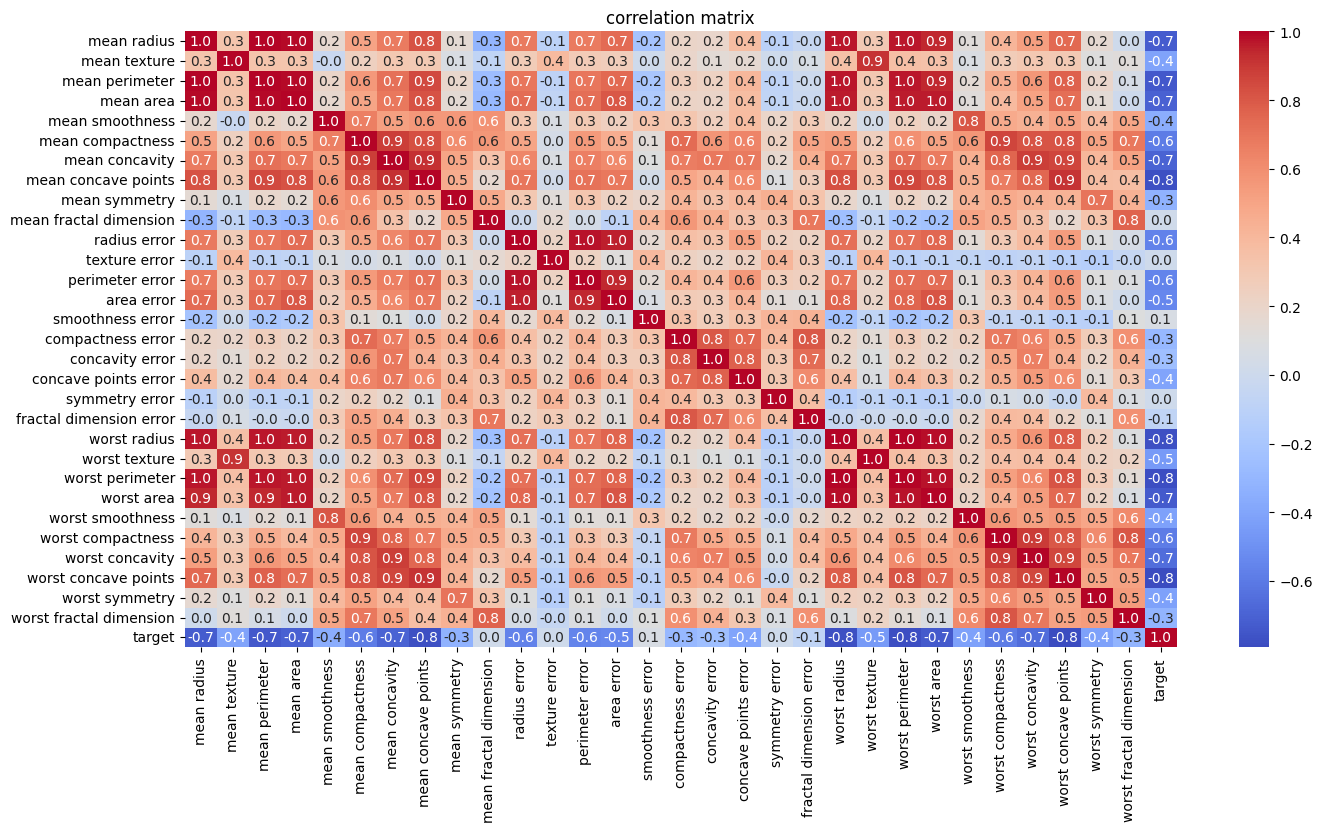

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,cmap='coolwarm',fmt='.1f',annot=True)
plt.title("correlation matrix")
plt.show()

**Separating feature and target**

In [15]:
X = df.drop('target',axis=1)
Y = df['target']

In [16]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


**hyperparameter** tuning using **GridSearchCV**

GreadSearchCV is used for detemining the best parameter

In [19]:
model = SVC()

In [20]:
Parameters = {
    'kernel' :['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

GreadSearchCV

In [21]:
classifier = GridSearchCV(model,Parameters,cv=5)

**Fitting data to the model**

In [22]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [23]:
classifier.cv_results_

{'mean_fit_time': array([1.52740250e+00, 5.07578850e-03, 5.92842102e-03, 1.57974720e-02,
        2.95382938e+00, 5.19185066e-03, 5.29179573e-03, 1.45655155e-02,
        4.64319081e+00, 5.44829369e-03, 5.23815155e-03, 1.43571854e-02,
        7.40105329e+00, 5.56807518e-03, 5.30309677e-03, 1.45626545e-02]),
 'std_fit_time': array([5.88422547e-01, 8.48264490e-05, 1.46242357e-04, 6.04688791e-04,
        5.35199924e-01, 5.00233256e-04, 9.28920641e-05, 7.61129264e-04,
        1.18817117e+00, 7.71683121e-05, 1.09742039e-04, 6.45207134e-04,
        2.44758535e+00, 1.95702556e-04, 3.16775755e-04, 8.43607282e-04]),
 'mean_score_time': array([0.00309634, 0.00239377, 0.00305829, 0.005094  , 0.00273437,
        0.0023315 , 0.00271645, 0.00471215, 0.00263238, 0.00239496,
        0.00273991, 0.00476942, 0.00271654, 0.00228863, 0.00269737,
        0.00473142]),
 'std_score_time': array([6.83555189e-04, 6.88630124e-05, 1.42835343e-04, 6.84236234e-05,
        5.38292372e-04, 4.88566152e-05, 4.68596782e-

**Best parameters**

In [25]:
best_parameters = classifier.best_params_
best_parameters

{'C': 10, 'kernel': 'linear'}

**Best score**

In [29]:
classifier.best_score_

np.float64(0.9525694767893185)

**Loading results to pandas dataframe**

In [27]:
result = pd.DataFrame(classifier.cv_results_)

In [36]:
result.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,4.643191,1.188171,0.002632,0.000130,10,linear,"{'C': 10, 'kernel': 'linear'}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
4,2.953829,0.535200,0.002734,0.000538,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
12,7.401053,2.447585,0.002717,0.000408,20,linear,"{'C': 20, 'kernel': 'linear'}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,3
0,1.527402,0.588423,0.003096,0.000684,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
6,0.005292,0.000093,0.002716,0.000047,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,5


In [33]:
grid_result = result[['param_C','param_kernel','mean_test_score']]

In [35]:
grid_result.sort_values(by='mean_test_score',ascending=False)

,param_C,param_kernel,mean_test_score
8,10,linear,0.952569
4,5,linear,0.950815
12,20,linear,0.949061
0,1,linear,0.945536
6,5,rbf,0.931501
5,5,poly,0.922729
10,10,rbf,0.922714
9,10,poly,0.920975
14,20,rbf,0.920944
13,20,poly,0.919221


As we saw above the best parametrs for SVC are **kernel = ' linear '** , **C = 10** and we got **accuracy = 95.3%**